In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Đọc dữ liệu
file_path = "data/10kmau2006.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tinh             9180 non-null   int64  
 1   ttnt             9180 non-null   int64  
 2   dantoc           9180 non-null   int64  
 3   tsnguoi          9180 non-null   int64  
 4   thunhap          9180 non-null   int64  
 5   chitieu          9180 non-null   float64
 6   chichonangluong  9180 non-null   float64
 7   chitiendien      8699 non-null   float64
 8   dienticho        9180 non-null   int64  
 9   chatluongo       9180 non-null   int64  
 10  tiepcandienluoi  9180 non-null   int64  
 11  chitiendienbq    9180 non-null   float64
 12  thunhapbq        9180 non-null   float64
 13  chinangluongbq   9180 non-null   float64
 14  chitieubq        9180 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 1.1 MB


,tinh,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,1,3,1040700,77234.0,7778.0,480.0,200,3,1,160.0,346900.00,2592.666667,25744.66667
1,1,0,1,4,675190,55513.0,6371.0,300.0,160,4,1,75.0,168797.50,1592.750000,13878.25000
2,1,1,1,2,316910,158547.0,10410.0,2400.0,48,3,1,1200.0,158455.00,5205.000000,79273.50000
3,1,0,1,4,549630,79017.0,9192.0,660.0,120,4,1,165.0,137407.50,2298.000000,19754.25000
4,1,0,1,4,518311,83863.0,13630.0,600.0,100,4,1,150.0,129577.75,3407.500000,20965.75000


In [5]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 tinh                 0
ttnt                 0
dantoc               0
tsnguoi              0
thunhap              0
chitieu              0
chichonangluong      0
chitiendien        481
dienticho            0
chatluongo           0
tiepcandienluoi      0
chitiendienbq        0
thunhapbq            0
chinangluongbq       0
chitieubq            0
dtype: int64


In [7]:
# Fill NaN trong cột chitiendien bằng 0
df['chitiendien'] = df['chitiendien'].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tinh             9180 non-null   int64  
 1   ttnt             9180 non-null   int64  
 2   dantoc           9180 non-null   int64  
 3   tsnguoi          9180 non-null   int64  
 4   thunhap          9180 non-null   int64  
 5   chitieu          9180 non-null   float64
 6   chichonangluong  9180 non-null   float64
 7   chitiendien      9180 non-null   float64
 8   dienticho        9180 non-null   int64  
 9   chatluongo       9180 non-null   int64  
 10  tiepcandienluoi  9180 non-null   int64  
 11  chitiendienbq    9180 non-null   float64
 12  thunhapbq        9180 non-null   float64
 13  chinangluongbq   9180 non-null   float64
 14  chitieubq        9180 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 1.1 MB


In [11]:
df.describe()

,tinh,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
count,9180.000000,9180.000000,9180.000000,9180.000000,9.180000e+03,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,4.446732,0.250871,0.842919,4.253377,3.377980e+04,24376.020577,2839.385447,616.855773,63.092048,1.142157,0.947603,177.602963,8492.695856,705.845245,6156.402211
std,2.658976,0.433538,0.363897,1.685627,3.540346e+04,20660.413353,2860.847873,810.953792,36.150503,0.822621,0.222837,276.000905,9170.412154,705.082598,5464.601121
min,1.000000,0.000000,0.000000,1.000000,6.400000e+01,1180.000000,25.000000,0.000000,5.000000,0.000000,0.000000,0.000000,16.000000,11.000000,611.500000
25%,2.000000,0.000000,1.000000,3.000000,1.559975e+04,12465.750000,1123.000000,240.000000,40.000000,1.000000,1.000000,60.000000,3957.575000,292.000000,3199.250000
50%,4.000000,0.000000,1.000000,4.000000,2.498650e+04,19203.500000,1981.500000,420.000000,55.000000,1.000000,1.000000,105.000000,6220.125000,492.000000,4768.000000
75%,7.000000,1.000000,1.000000,5.000000,4.044750e+04,29852.250000,3582.000000,720.000000,78.000000,1.000000,1.000000,200.000000,10047.937500,872.000000,7378.500000
max,8.000000,1.000000,1.000000,17.000000,1.040700e+06,583104.000000,57000.000000,36000.000000,425.000000,4.000000,1.000000,9000.000000,346900.000000,12073.000000,135352.000000


In [13]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.136077,0.013333,1.0,0.017778,0.214033,1.000000,1.000000,0.1250,1.0,1.0,0.464286
1,0.111382,0.008333,1.0,0.008333,0.131135,0.648763,0.486565,0.1875,0.0,1.0,0.369048
2,0.182273,0.066667,1.0,0.133333,0.430609,0.304473,0.456749,0.0625,1.0,1.0,0.102381
3,0.160895,0.018333,1.0,0.018333,0.189604,0.528106,0.396073,0.1875,0.0,1.0,0.273810
4,0.238789,0.016667,1.0,0.016667,0.281587,0.498010,0.373502,0.1875,0.0,1.0,0.226190


In [15]:

pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


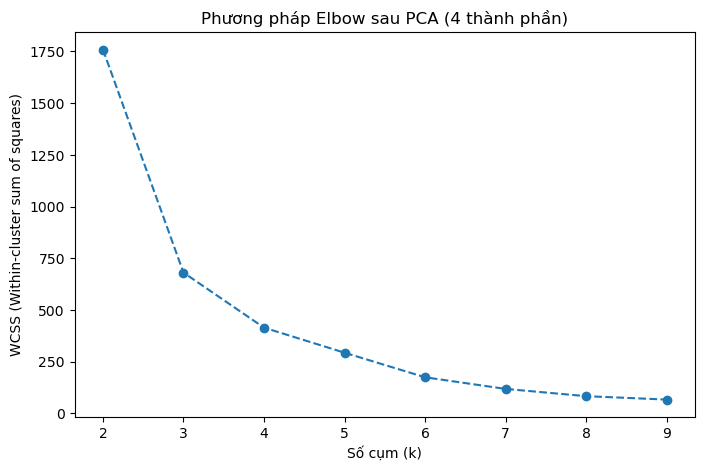

In [17]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

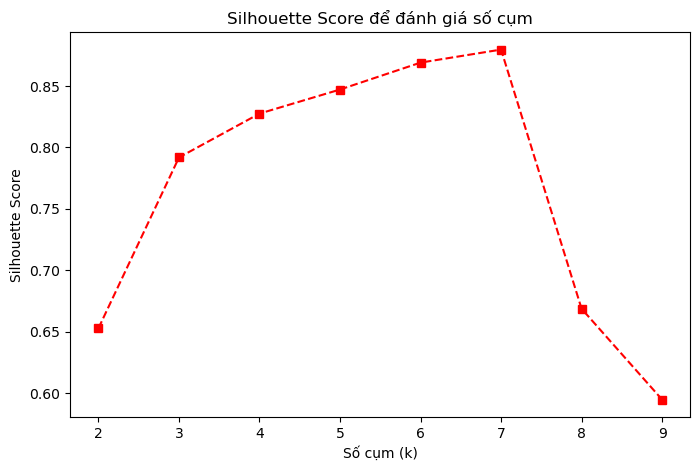

In [18]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [20]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5575
1    2163
2    1442
Name: count, dtype: int64


In [21]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                2322.206888   505.600359         0.964484     149.373555   
1                4759.987748  1067.408692         0.963939     309.887072   
2                1957.976075   371.157420         0.857836      88.316153   

             chinangluongbq       thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                   
0                576.853975  29867.641256   7512.433341  4.105471  0.000000   
1               1224.105030  51581.014794  13492.092240  4.074896  1.000000   
2                427.156213  22203.002774   4783.451152  5.092926  0.097087   

             dantoc  dienticho  
Cluster_PCA                     
0               1.0  59.993901  
1               1.0  72.317614  
2               0.0  61.231623  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5575
1    2163
2    1442
Name: count, dtype: int64


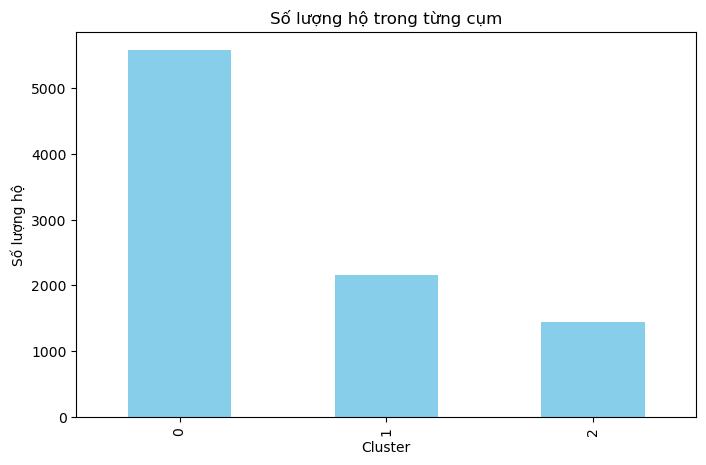

In [22]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                  thunhap     thunhapbq       chitieu    chitieubq
Cluster_PCA                                                       
0            29867.641256   7512.433341  21213.212143  5392.291251
1            51581.014794  13492.092240  37245.032270  9754.427571
2            22203.002774   4783.451152  17300.420527  3713.537959


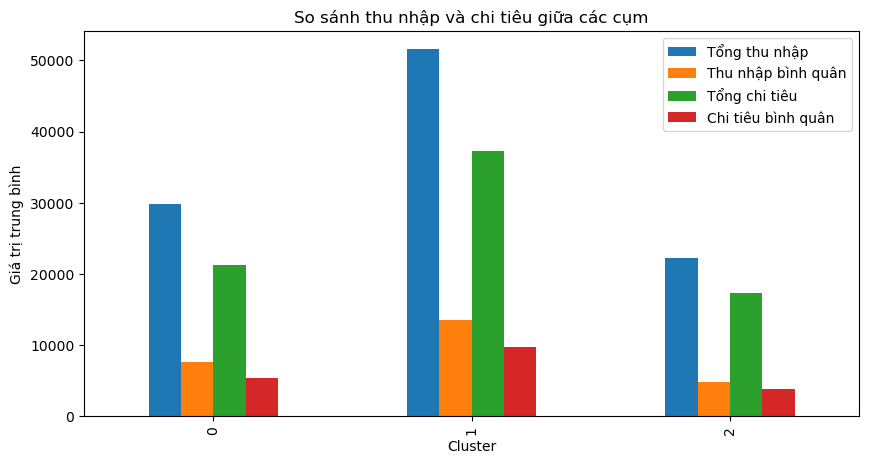

In [23]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                2322.206888      576.853975   505.600359     149.373555
1                4759.987748     1224.105030  1067.408692     309.887072
2                1957.976075      427.156213   371.157420      88.316153


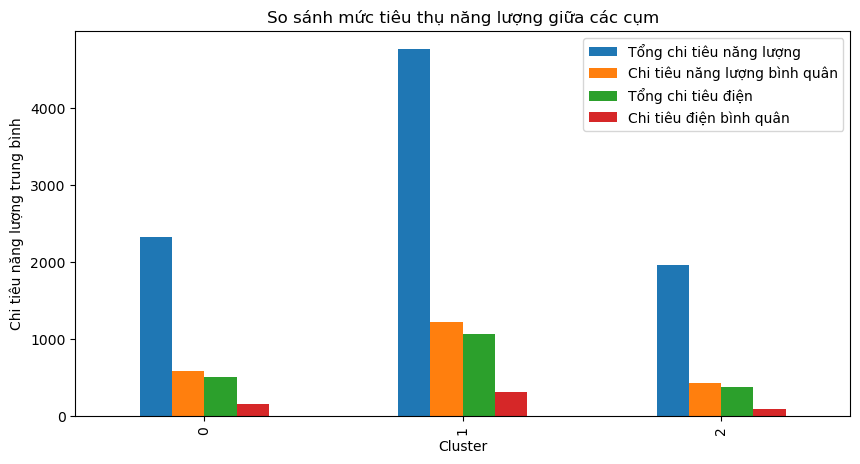

In [24]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    96.448430
1    96.393897
2    85.783634
Name: tiepcandienluoi, dtype: float64


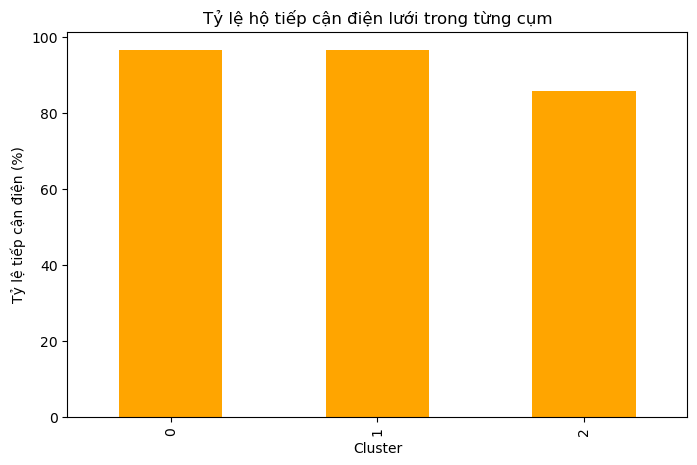

In [25]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0      0.0
1      0.0
2    100.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.000000
1      0.000000
2     90.291262
Name: ttnt, dtype: float64


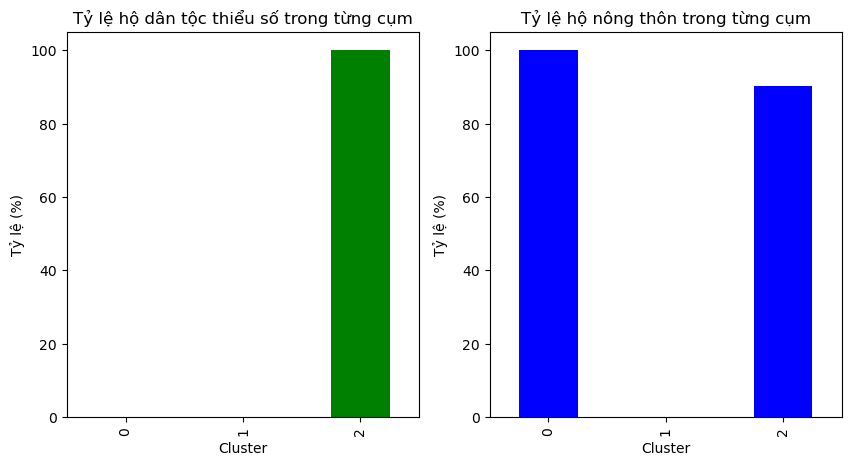

In [26]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            4.105471  59.993901
1            4.074896  72.317614
2            5.092926  61.231623


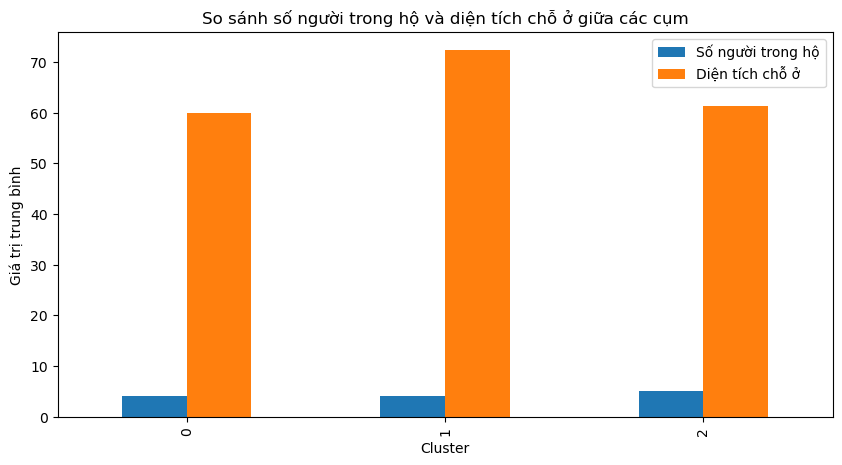

In [27]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()